# ML Project Final - S7CSE A

1. Bhavya Avuthu AM.EN.U4CSE18012
2. Bijesh Reddy AM.EN.U4CSE18030
3. Naveen Yenuganti AM.EN.U4CSE18040
4. Swathi Kasikala AM.EN.U4CSE18053

# Phase 0

### ABSTRACT
### Informal description:
To predict whether a person is suffering from heart disease or not.
### Formal description:
A computer program is said to learn from experience E with respect to some
class of tasks T and performance measure P, if its performance at tasks in T,
as measured by P, improves with experience E.<br>
Task T: Classify whether a person is suffering from heart disease or not.<br>
Experience E: Details of 13-15 clinical parameters of numerous people where some are suffering from heart disease and some are not.<br>
Performance P: Classification accuracy, the number of persons suffering with heart disease predicted correctly out of all the people considered as a percentage.<br>
### Introduction
#### Motivation :
Heart disease is one of the biggest causes of mortality among the population 
of the world. Prediction of cardiovascular disease is regarded as one of the
most important subjects in the section of clinical data analysis. But it is
difficult to identify heart disease because of several contributory risk factors
such as diabetes, high blood pressure, high cholesterol, abnormal pulse rate,
and many other factors. Machine learning ML proves to be effective in
assisting in making decisions and predictions from the large quantity of data
produced by the healthcare industry.
#### Benefits of solution :
Machine Learning can play an essential role in predicting presence/absence
of Heart diseases and more. Such information, if predicted well in advance,
can provide important insights to doctors who can then adapt their diagnosis
and treatment per patient basis.
Solution Use:
This can find patterns to find out people vulnerable to getting sick with heart
diseases. In future the work can be enhanced by developing a web application
as well as using a larger dataset which will help to provide better results and
help health professionals in predicting heart disease effectively and efficiently.
### Dataset finalization
Data Set1: https://www.kaggle.com/johnsmith88/heart-disease-dataset<br>
##### Data Set Attributes:<br>
1. age: Age of the patient in years
2. sex: Male/Female
3. chest pain type 4 values
4. resting blood pressure
5. serum cholesterol in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results values 0,1,2
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels 0-3 colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversible defect<br>

# Phase1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

file='heart.csv'
data=read_csv(file)

1. age: The person's age in years
2. sex: The person's sex (1 = male, 0 = female)
3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
5. chol: The person's cholesterol measurement in mg/dl
6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach: The person's maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. ca: The number of major vessels (0-3)
13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: Heart disease (0 = no, 1 = yes)

In [2]:
data.shape

(303, 14)

In [3]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Summarization

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


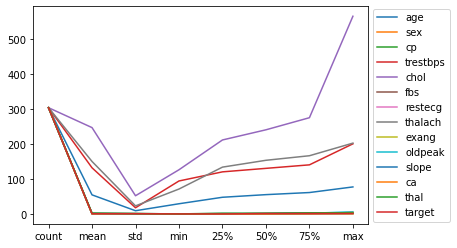

In [5]:
data.describe().plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [6]:
categorical_values=[]
for column in data.columns:
    print('----------------------------')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_values.append(column)

----------------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
----------------------------
sex : [1 0]
----------------------------
cp : [3 2 1 0]
----------------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
----------------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172

# Data Visualization

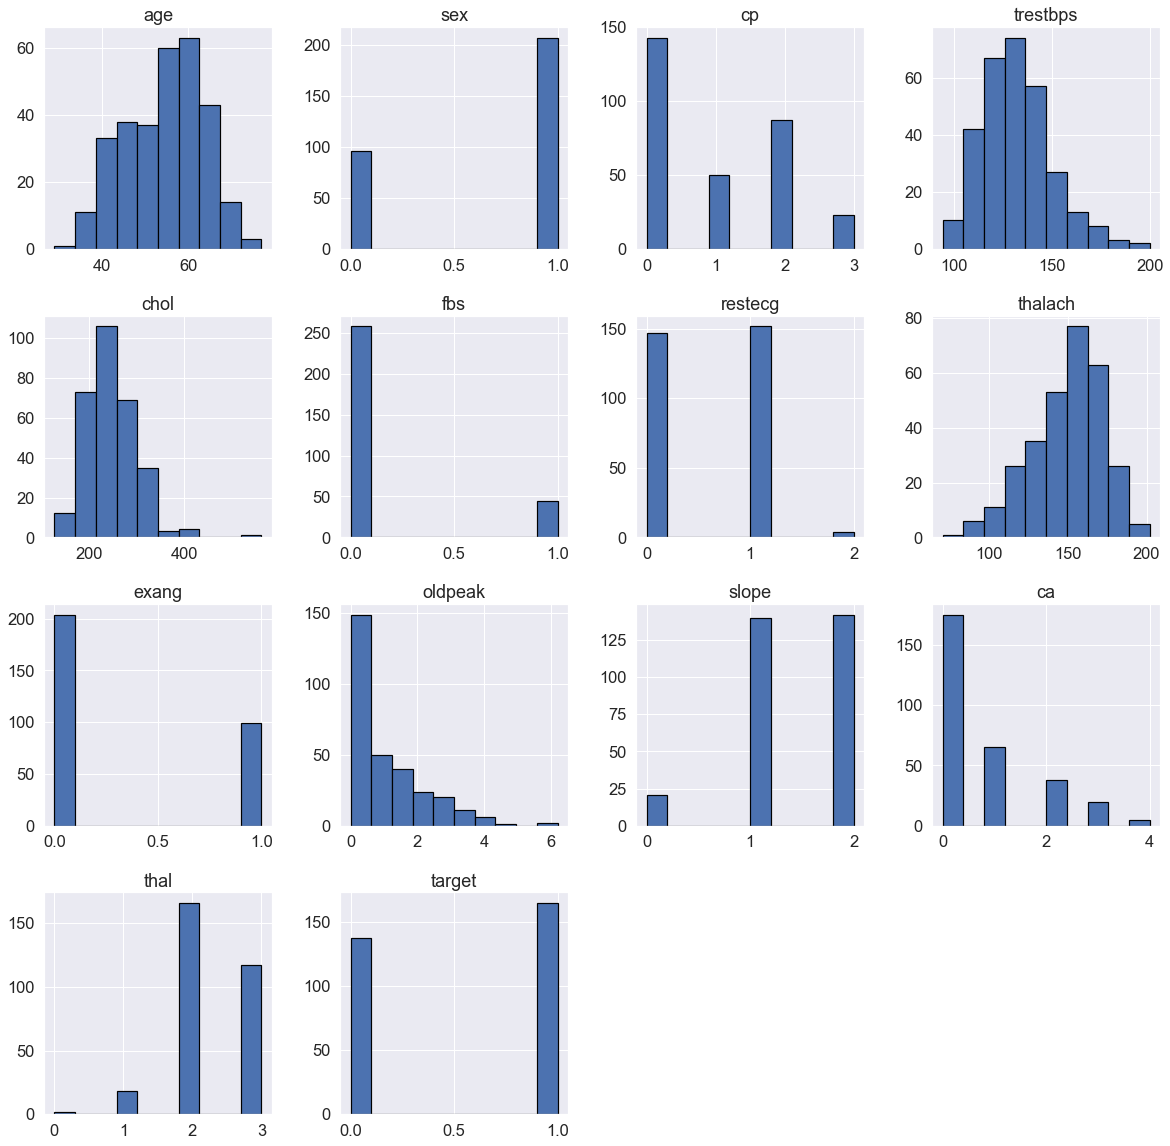

In [7]:
sns.set(font_scale=1.5)
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

Text(0.5, 1.0, '0 : Patients not having a heart disease, 1: Patients having a heart disease')

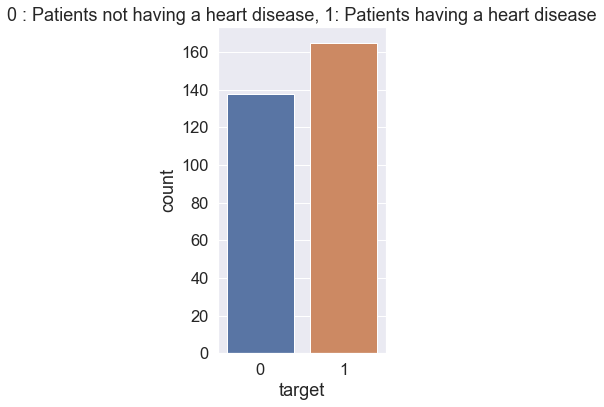

In [8]:
plt.figure(figsize=(3,6))
sns.countplot(data.target)
plt.title ("0 : Patients not having a heart disease, 1: Patients having a heart disease")

Text(0.5, 1.0, 'Target vs Gender')

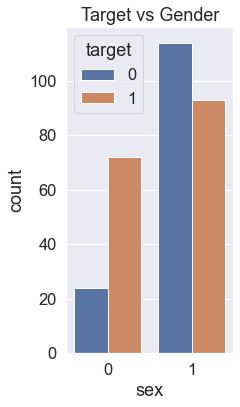

In [9]:
plt.figure(figsize=(3,6))
sns.countplot(x='sex',hue='target',data=data).set_title("Target vs Gender")

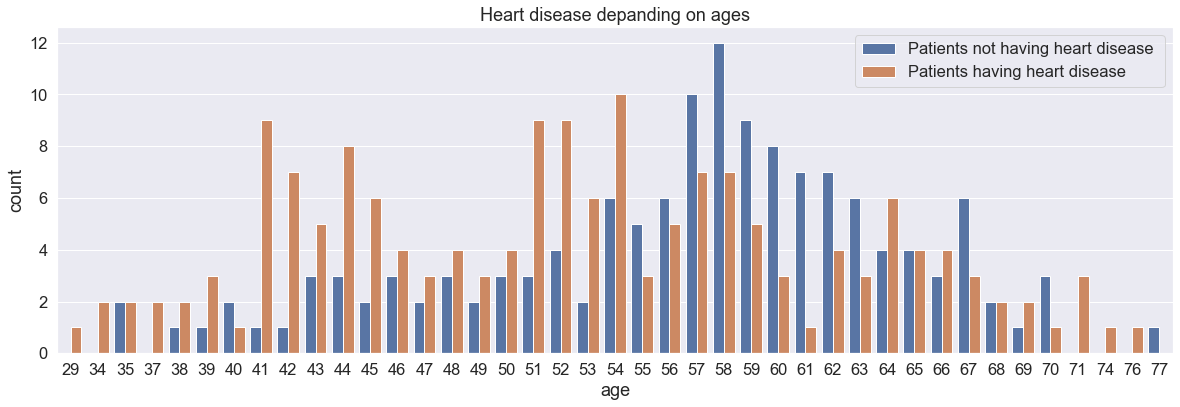

In [10]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'age', hue = 'target', data = data)
plt.title("Heart disease depanding on ages")
plt.legend(["Patients not having heart disease ","Patients having heart disease "], loc= "upper right")

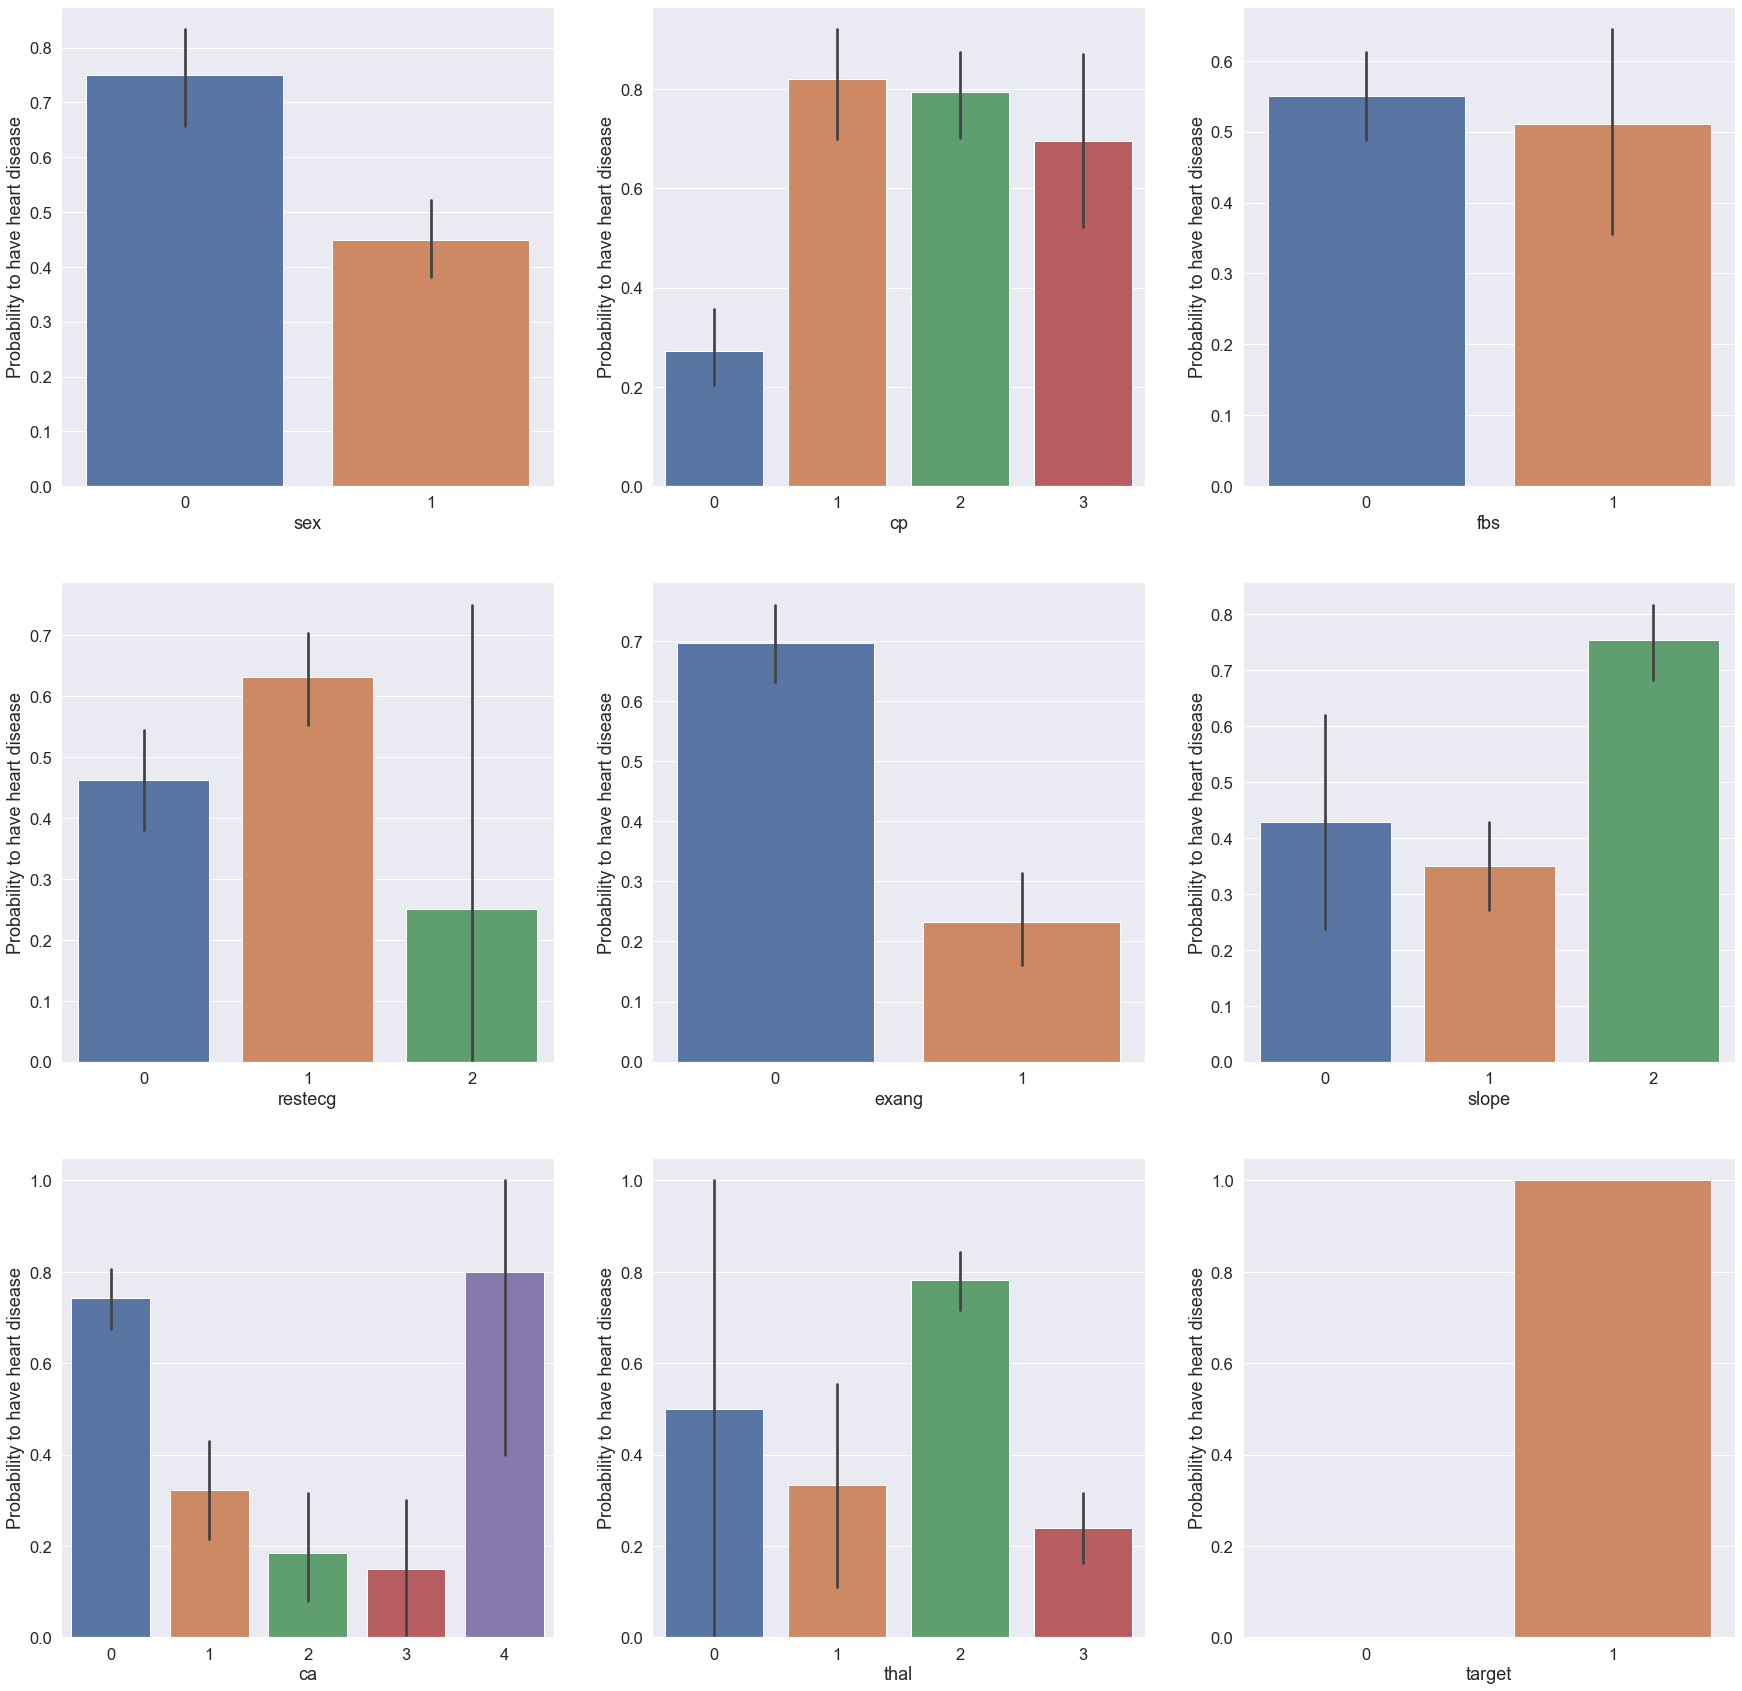

In [11]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=data)
    plt.ylabel('Probability to have heart disease')
    plt.xlabel(f'{column}')

# Standardization

In [12]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])
print(data.head(5))

        age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   

   cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  \
0     0     0  ...        0     1     0     0     0     0       0       1   
1     0     0  ...        0     1     0     0     0     0       0       0   
2     0     1  ...        1     1     0     0     0     0       0       0   
3     0     1  ...        1     1     0     0     0     0       0       0   
4     1     0  ...        1     1     0     0     0     0       0       0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1     

In [13]:
data.isnull().sum()

age          0
trestbps     0
chol         0
thalach      0
oldpeak      0
target       0
sex_0        0
sex_1        0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
fbs_0        0
fbs_1        0
restecg_0    0
restecg_1    0
restecg_2    0
exang_0      0
exang_1      0
slope_0      0
slope_1      0
slope_2      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
ca_4         0
thal_0       0
thal_1       0
thal_2       0
thal_3       0
dtype: int64

Therefore, No missing values

# Phase 2

# Learning Algorithms 

In [14]:
y = data['target']
X = data.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
scores_dict={}

1. K Neighbors Classifier
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# K Neighbors Classifier
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. ... In k-NN classification, the output is a class membership.

In [16]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Scores for different neighbor values are stored in the array `knn_scores`. Plotting it and checking for which value of K we get the best scores.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

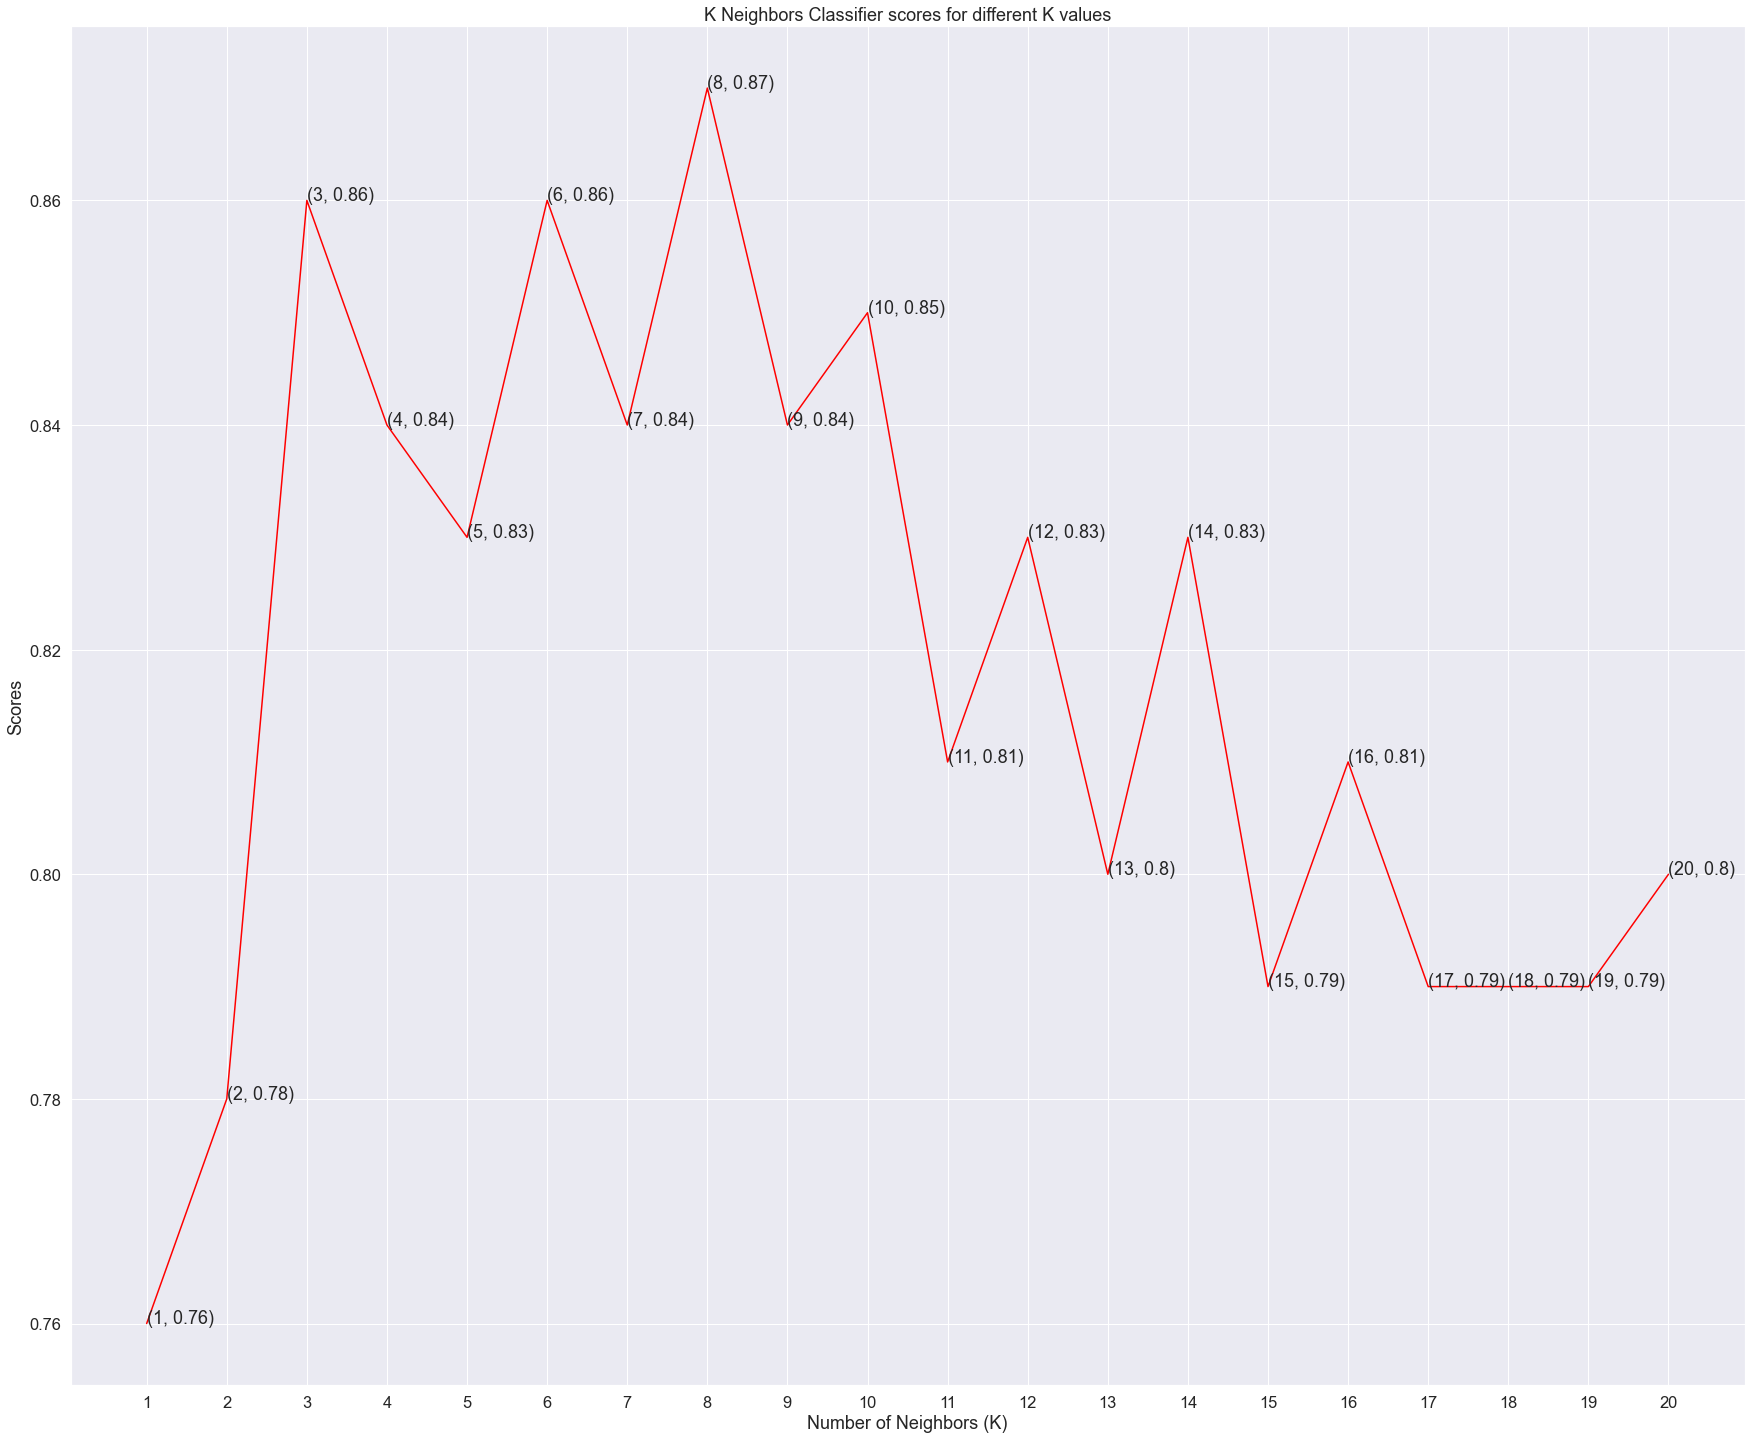

In [17]:
plt.figure(figsize=(30,25))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was `0.87` for the 8 neighbors.

In [18]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))
scores_dict["KNN"]=knn_scores[7]*100

The score for K Neighbors Classifier is 87.0% with 8 nieghbors.


# Support Vector Classifier

In [19]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Tested several kernels for Support Vector Classifier. Plotting a bar plot of scores for each kernel and see which performed the best.



Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

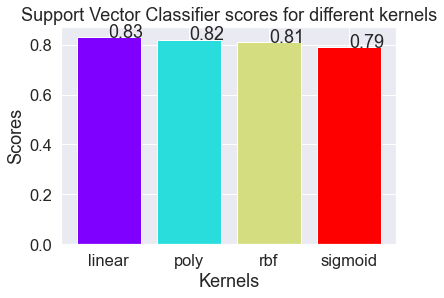

In [20]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The `linear` kernel performed the best, being slightly better than `rbf` kernel.


In [21]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))
scores_dict["SVC"]=svc_scores[0]*100

The score for Support Vector Classifier is 83.0% with linear kernel.


# Decision Tree Classifier

In [22]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Varying between a set of `max_features` to see which returns the best accuracy. Selected the maximum number of features from 1 to 30 for split. Let's see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

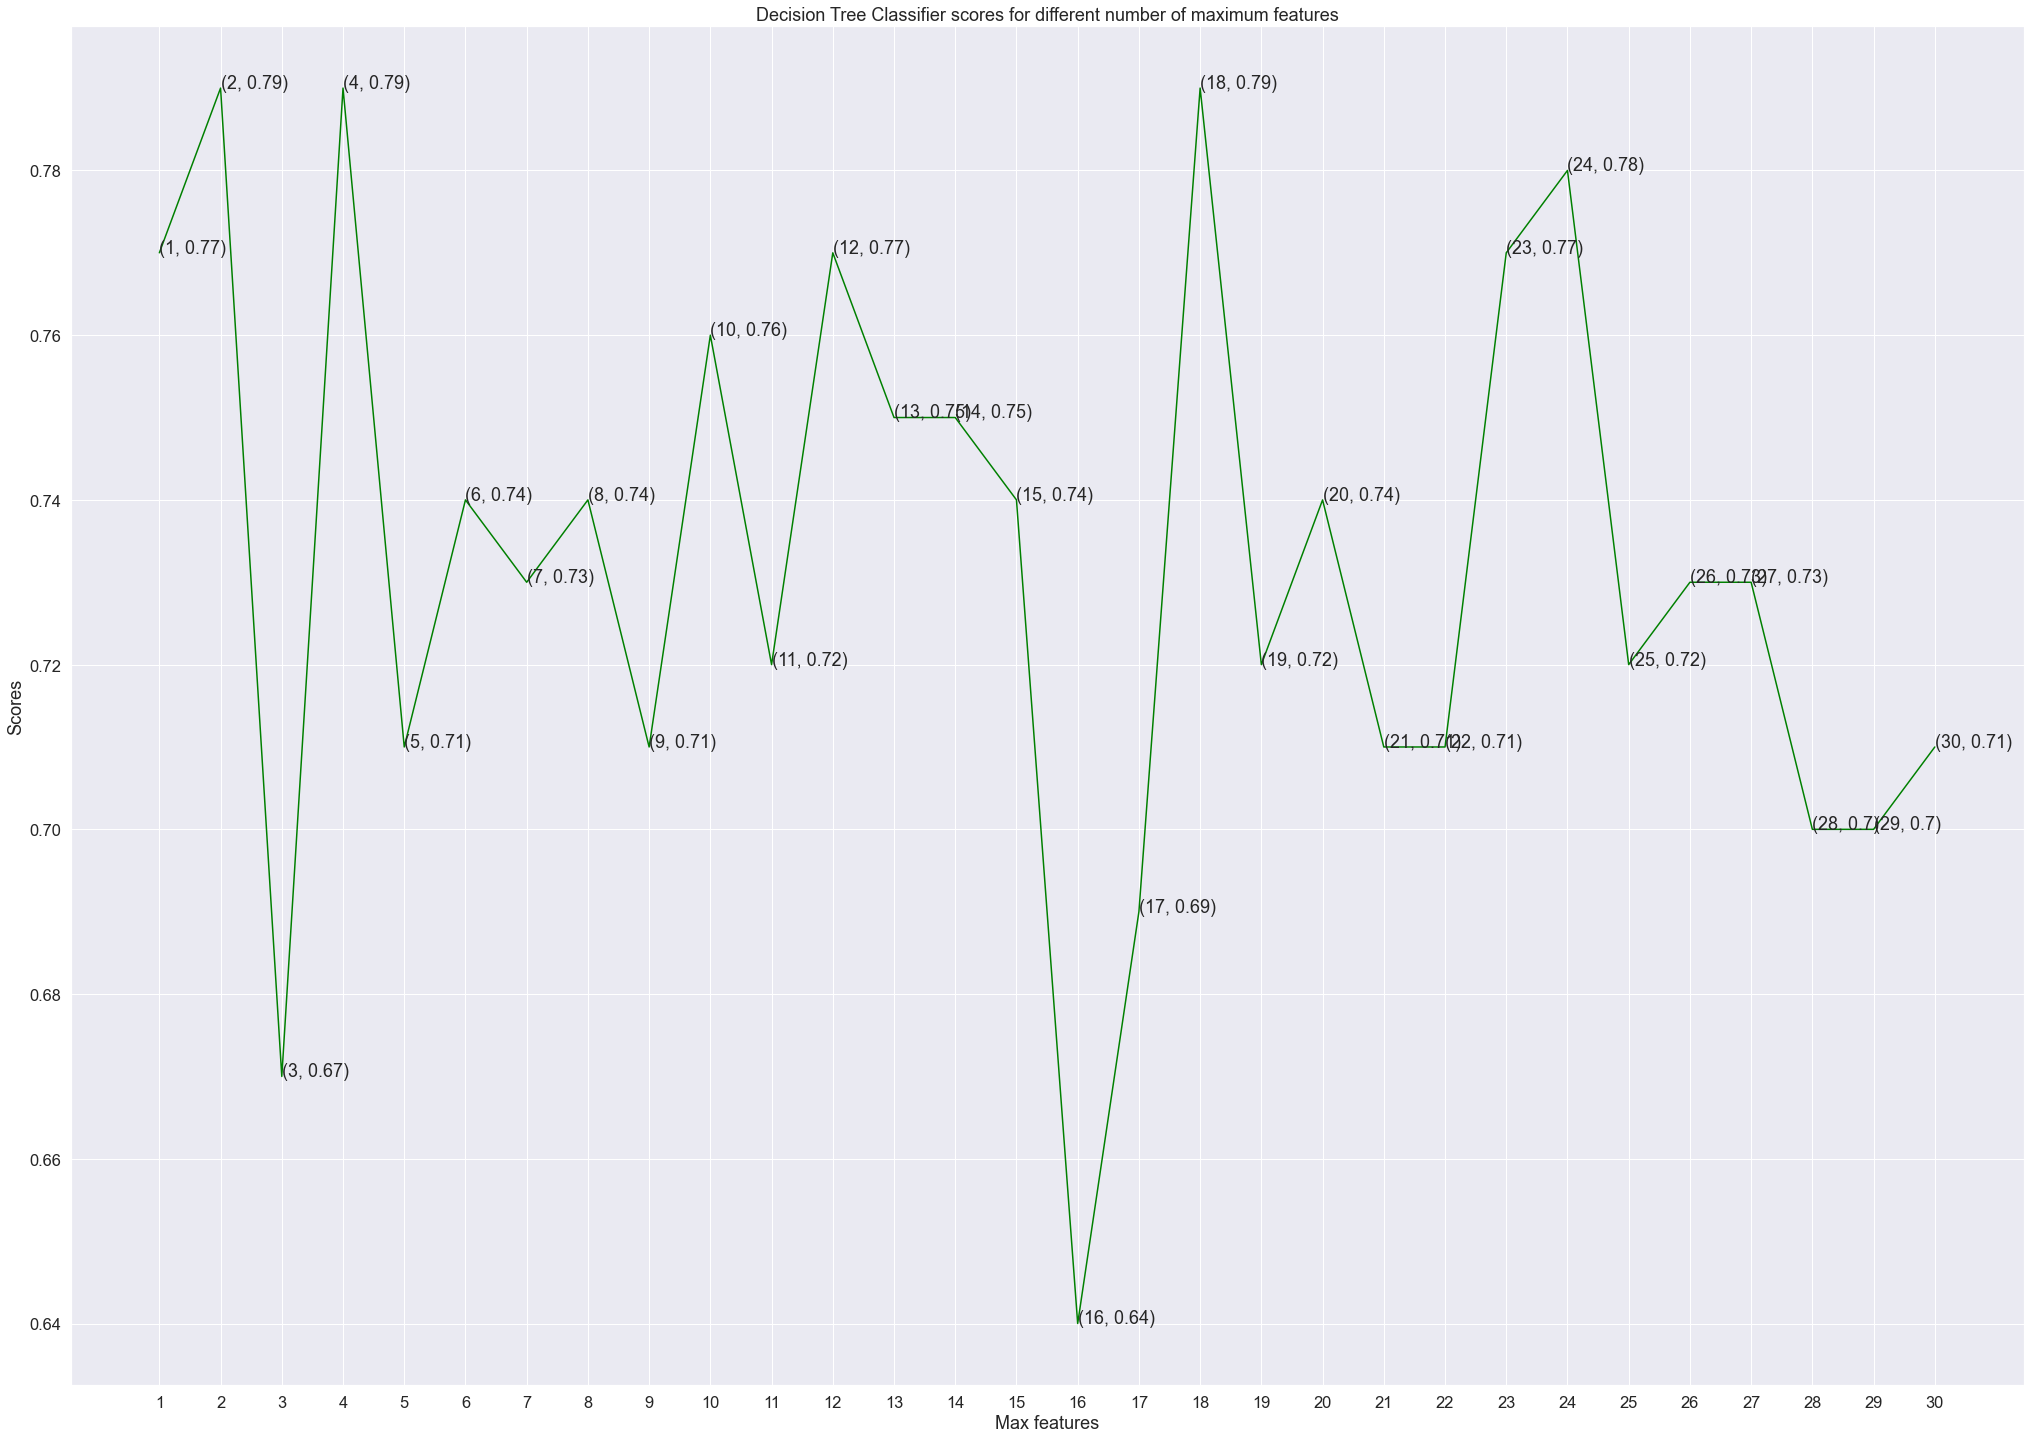

In [23]:
plt.figure(figsize=(35,25))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at three values of maximum features, `2`, `4` and `18`.

In [24]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))
scores_dict["DT"]=dt_scores[17]*100

The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.


# Random Forest Classifier

In [25]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Trained the model and the recorded the scores. Plotting a bar plot to compare the scores.

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

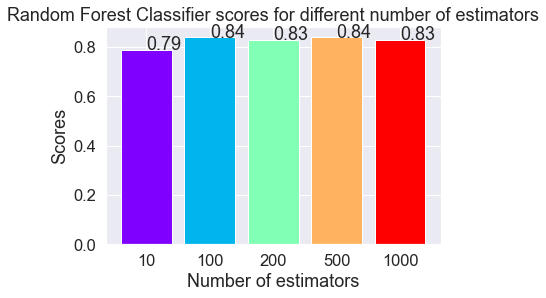

In [26]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The maximum score is achieved when the total estimators are 100 or 500.

In [27]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))
scores_dict["RF"]=rf_scores[1]*100

The score for Random Forest Classifier is 84.0% with [100, 500] estimators.


# Algorithm Comparison

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

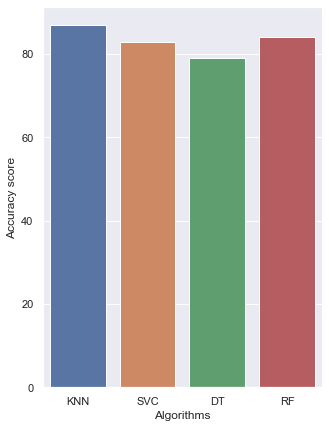

In [28]:
algo_name = list(scores_dict.keys())
scoress = list(scores_dict.values())
sns.set(rc={'figure.figsize':(5,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algo_name,scoress)

Applied four Machine Learning algorithms, `K Neighbors Classifier`, `Support Vector Classifier`, `Decision Tree Classifier` and `Random Forest Classifier`. I varied parameters across each model to improve their scores.
In the end, `K Neighbors Classifier` achieved the highest score of `87%` with `8 nearest neighbors`.